In [1]:
# %matplotlib widget


In [2]:
import random
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

import Unsupervised_TG

In [3]:
def generate_random_points_n_spaces(x1,x2,no_of_points,dim=3):
    coordinates=[]
    for n in range(no_of_points):
        xyx=[]
        for d in range(dim):
            x=random.randint(x1,x2)
            xyx.append(x)
        coordinates.append(tuple(xyx))
    return np.array(coordinates)

coordinates=generate_random_points_n_spaces(x1=100,x2=1000,no_of_points=100,dim=2)
coordinates.shape

(100, 2)

Fitting  5  clusters
Shape of input data :  (100, 2)
Running iteration : 1


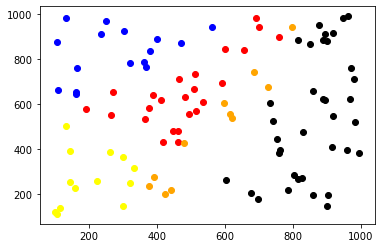

Total Distance between coordinates : 888.4241071038253
Running iteration : 2


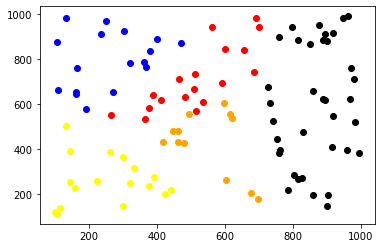

Total Distance between coordinates : 275.3282796587209
Running iteration : 3


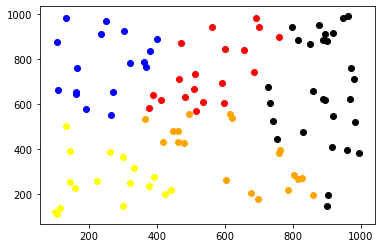

Total Distance between coordinates : 236.5791950089756
Running iteration : 4


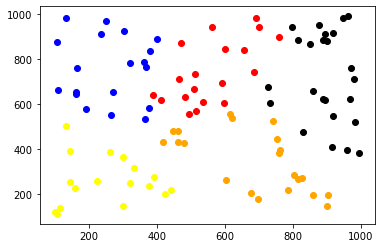

Total Distance between coordinates : 151.22033475818571
Running iteration : 5


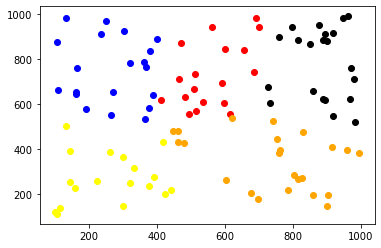

Total Distance between coordinates : 158.97095705916848
Running iteration : 6


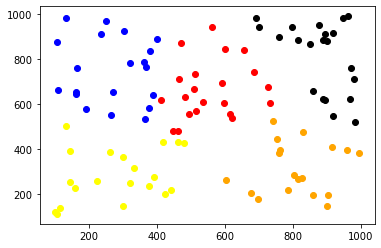

Total Distance between coordinates : 198.12827746751591
Running iteration : 7


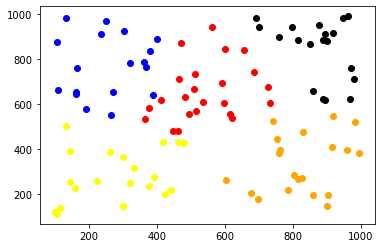

Total Distance between coordinates : 99.69408595904011
Running iteration : 8


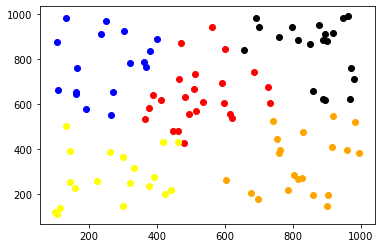

Total Distance between coordinates : 56.949703096466436
Running iteration : 9


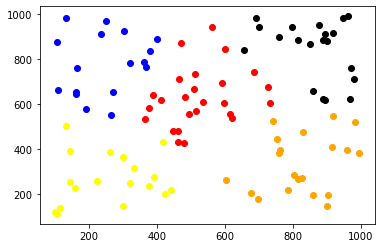

Total Distance between coordinates : 22.275470206836623
Running iteration : 10


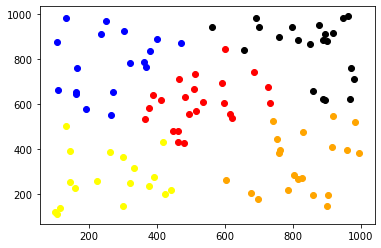

Total Distance between coordinates : 52.521817369856414
Running iteration : 11


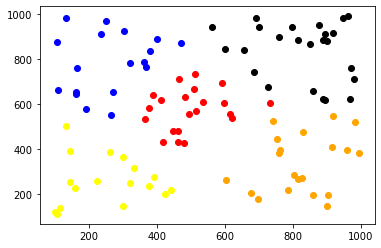

Total Distance between coordinates : 77.53502241038501
Running iteration : 12


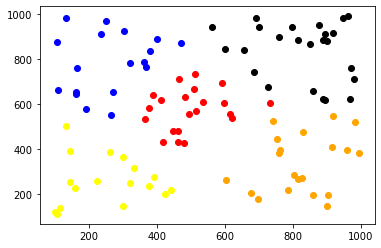

Total Distance between coordinates : 0.0
Total time taken (in seconds) :  1.16


In [4]:
obj=Unsupervised_TG.KMeans_TG(coordinates,no_of_clusters=5,plot=2,max_iter=30)
obj.fit()

In [9]:
coordinates_test=generate_random_points_n_spaces(x1=100,x2=1000,no_of_points=100,dim=2)


In [10]:
obj.predict(coordinates_test)

Total time taken (in seconds) :  0.0


{0: [array([461, 499]),
  array([347, 460]),
  array([526, 725]),
  array([732, 585]),
  array([418, 668]),
  array([521, 417]),
  array([439, 507]),
  array([608, 415]),
  array([736, 570]),
  array([388, 521]),
  array([586, 705]),
  array([381, 592]),
  array([576, 614]),
  array([558, 447])],
 1: [array([183, 412]),
  array([302, 458]),
  array([476, 299]),
  array([109, 348]),
  array([491, 241]),
  array([390, 267]),
  array([363, 222]),
  array([308, 130]),
  array([540, 147]),
  array([269, 163]),
  array([159, 393]),
  array([216, 311]),
  array([133, 311]),
  array([208, 363]),
  array([100, 521]),
  array([223, 313]),
  array([154, 398]),
  array([226, 212]),
  array([319, 459]),
  array([248, 394]),
  array([121, 314]),
  array([468, 131])],
 2: [array([196, 987]),
  array([448, 931]),
  array([327, 729]),
  array([254, 952]),
  array([449, 842]),
  array([235, 560]),
  array([364, 882]),
  array([109, 734]),
  array([213, 871]),
  array([171, 861]),
  array([118, 739]),
  